In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import rasterio
import gc
from skimage import io

# RTI_analysis function: This script serves as a exploratory analysis for the RTI full dataset

## Objectives: 1. Measure how big coverage the dataset is, how many villages is covered, how many solar panels approximately would there be


In [30]:
# Objective 1: Just take a look at the smallest tile and see what's going on....
dataset = rasterio.open('/scratch/sr365/RTI_Rwanda_full/rti_rwanda_crop_type_raw/rti_rwanda_crop_type_raw_Ngarama_Processed_Phase1/image.tif')


In [31]:
print(dataset.mode)

r


In [32]:
print(dataset.count)

4


In [33]:
print(dataset.width)

29937


In [34]:
print(dataset.height)

23361


In [9]:
dataset.bounds

BoundingBox(left=771840.96735, bottom=9770931.39649, right=772778.3712200001, top=9771918.04631)

In [10]:
dataset.indexes

(1, 2, 3, 4)

In [19]:
img1 = dataset.read(1)

In [20]:
print(np.shape(img1))

(23942, 22747)


In [21]:
sample_rate = 5
img1_subsample = img1[::sample_rate, ::sample_rate]

In [23]:
print('shape of subsampled imgaery: = {}'.format(np.shape(img1_subsample)))

shape of subsampled imgaery: = (4789, 4550)


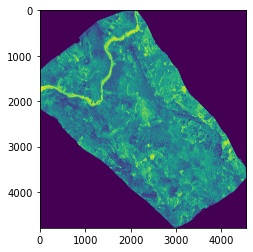

In [24]:
plt.imshow(img1_subsample)

In [35]:
sample_rate = 5
num_channels = len(dataset.indexes)
print('number of channels = {}'.format(num_channels))
img_big = np.zeros([dataset.height, dataset.width, num_channels])
for i in range(num_channels):
    img = dataset.read(i+1)
    img_big[:, :, i] = img
img_subsampled = img_big[::sample_rate, ::sample_rate, :]
del img_big
del img
gc.collect()

number of channels = 4


0

In [36]:
#np.shape(img_subsampled)
#io.imshow(img_subsampled[:,:,0])
#plt.imshow(img_subsampled[:,:,:3])
io.imsave('RTI_test.png', img_subsampled)
#print(np.min(img_subsampled[:,:,0], axis=0))

ipykernel_launcher:4: UserWarning: RTI_test.png is a low contrast image
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


in channel 0, the max is 0.0, min is 255.0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
in channel 1, the max is 0.0, min is 255.0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
in channel 2, the max is 0.0, min is 255.0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
in channel 3, the max is 0.0, min is 255.0
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


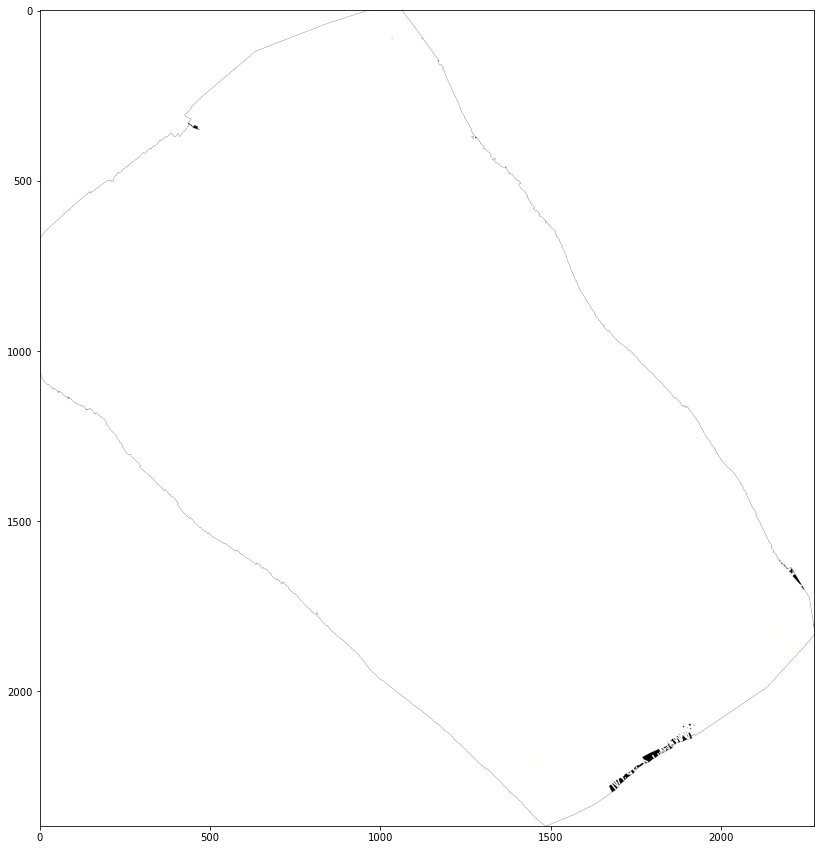

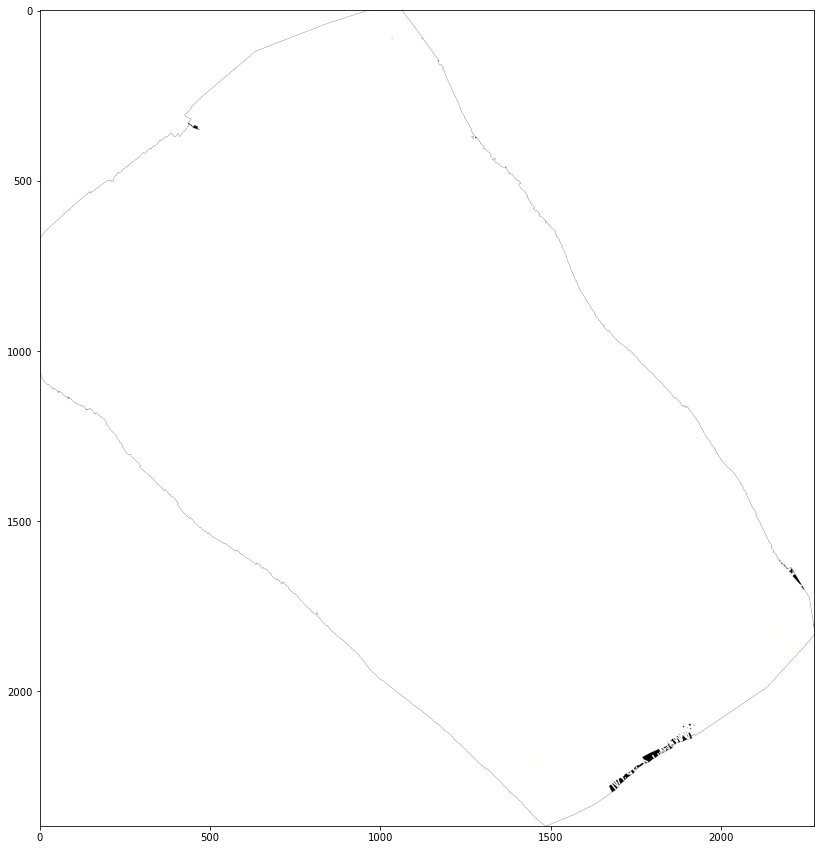

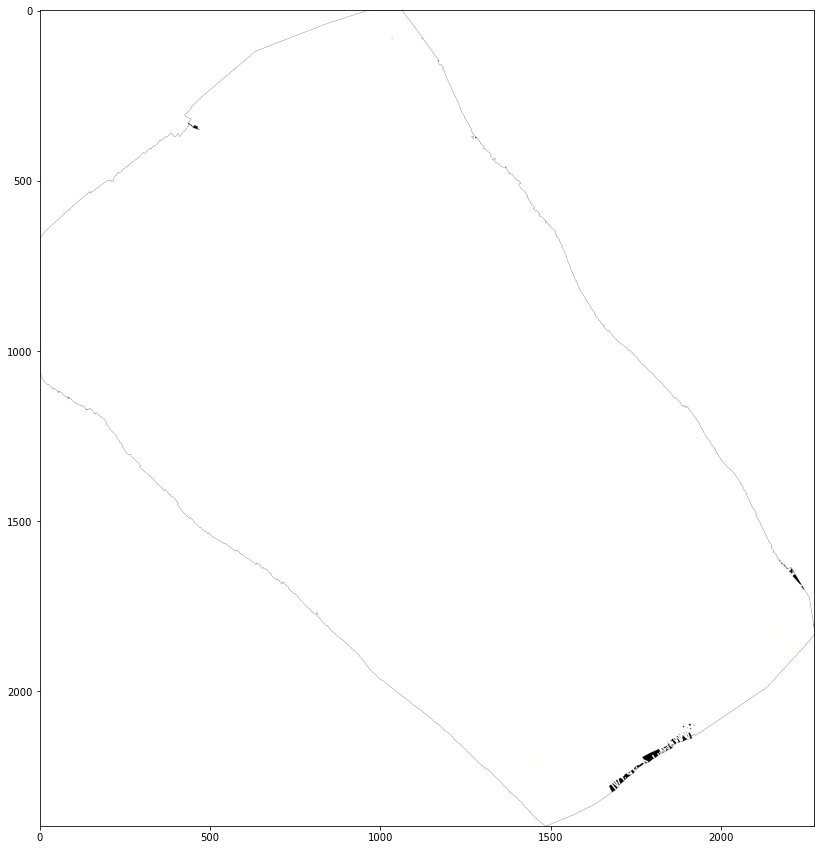

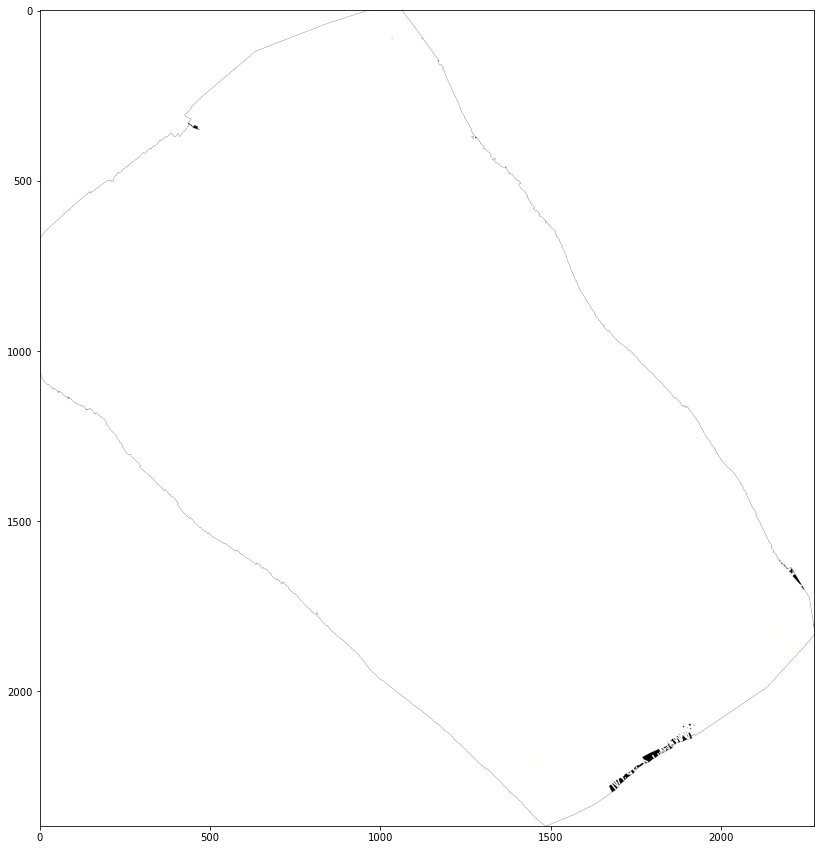

In [17]:
for i in range(4):
    print('in channel {}, the min is {}, max is {}'.format(i, np.min(img_subsampled[:,:,i]), np.max(img_subsampled[:,:, i])))
    f = plt.figure(figsize=[15,15])
    plt.imshow(img_subsampled)